# Tweets_with_location Dataset

## Downloading dataset

In [1]:
import pandas as pd

file_path = 'Tweets_with_location.csv'
try:
    tweets_df = pd.read_csv(file_path, encoding='ISO-8859-1')
except UnicodeDecodeError as e:
    print(f"Error loading file: {e}")

In [13]:
# Display the first few rows of the dataframe for an initial assessment
tweets_df.head()

,Name,UserName,Time,Text,Likes,Retweets,TweetURL,UserURL,City,Unnamed: 10,Unnamed: 11
0,Gerald Butts,gmbutts,2022-01-24 22:24:00,I'm glad serious researchers are taking up thi...,17,50,https://twitter.com/gmbutts/status/14857402380...,https://twitter.com/gmbutts,0,NaN,NaN
1,Gerald Butts,gmbutts,2022-01-24 22:27:00,1. Partisan adhesion in Canada is weak and par...,2,31,https://twitter.com/gmbutts/status/14857409939...,https://twitter.com/gmbutts,0,NaN,NaN
2,Abigail Boyd,AbigailBoydMLC,2022-03-07 23:46:00,"Minister Ayers, what are you doing to assist t...",8,12,https://twitter.com/AbigailBoydMLC/status/1500...,https://twitter.com/AbigailBoydMLC,0,NaN,NaN
3,Warren Gunnels,GunnelsWarren,2022-02-22 23:49:00,I want cable news to cover the child poverty r...,5418,203000,https://twitter.com/GunnelsWarren/status/14962...,https://twitter.com/GunnelsWarren,0,NaN,NaN
4,Scalawag,scalawagmag,2022-03-21 21:45:00,"""If we don't adapt the internet to the reality...",1,9,https://twitter.com/scalawagmag/status/1506024...,https://twitter.com/scalawagmag,0,NaN,NaN


## Data cleaning

In [7]:
# Handle Missing Data:

def handle_missing_data(df):
    # Create a copy of the DataFrame to avoid warnings
    df_cleaned = df.copy()
    
    # Drop rows with missing values in specified columns
    columns_to_drop_na = ['Name', 'UserName', 'Time', 'Text', 'TweetURL', 'UserURL']
    df_cleaned.dropna(subset=columns_to_drop_na, inplace=True)
    
    # Fill missing values in 'Likes' and 'Retweets' with 0
    df_cleaned['Likes'].fillna(0, inplace=True)
    df_cleaned['Retweets'].fillna(0, inplace=True)
    
    # Drop the 'Country' column if not needed
    if 'Country' in df_cleaned.columns:
        df_cleaned.drop(columns=['Country'], inplace=True)
    
    return df_cleaned

In [8]:
# Data Type Conversion:

def convert_data_types(df):
    # Create a copy of the DataFrame to avoid warnings
    df_converted = df.copy()
    
    # Convert 'Time' column to datetime
    df_converted['Time'] = pd.to_datetime(df_converted['Time'])
    
    # Convert 'Likes' and 'Retweets' to integers
    df_converted['Likes'] = df_converted['Likes'].astype(int)
    df_converted['Retweets'] = df_converted['Retweets'].astype(int)
    
    return df_converted

In [9]:
# Text Cleaning:

def clean_text(df):
    # Create a copy of the DataFrame to avoid warnings
    df_cleaned_text = df.copy()
    
    # Remove URLs from 'Text' column
    df_cleaned_text['Text'] = df_cleaned_text['Text'].apply(lambda x: re.sub(r'http\S+', '', x))
    
    # Add more text cleaning steps as needed, e.g., removing special characters, hashtags, mentions.
    
    return df_cleaned_text

In [14]:
# Clean the dataset
tweets_df = handle_missing_data(tweets_df)
print("\nDataFrame after handling missing data:")
print(tweets_df.head())

tweets_df = convert_data_types(tweets_df)
print("\nDataFrame after data type conversion:")
print(tweets_df.head())

tweets_df = clean_text(tweets_df)
print("\nDataFrame after text cleaning:")
print(tweets_df.head())

# Now, tweets_df contains the cleaned data.


DataFrame after handling missing data:
             Name        UserName                Time  \
0    Gerald Butts         gmbutts 2022-01-24 22:24:00   
1    Gerald Butts         gmbutts 2022-01-24 22:27:00   
2    Abigail Boyd  AbigailBoydMLC 2022-03-07 23:46:00   
3  Warren Gunnels   GunnelsWarren 2022-02-22 23:49:00   
4        Scalawag     scalawagmag 2022-03-21 21:45:00   

                                                Text  Likes  Retweets  \
0  I'm glad serious researchers are taking up thi...     17        50   
1  1. Partisan adhesion in Canada is weak and par...      2        31   
2  Minister Ayers, what are you doing to assist t...      8        12   
3  I want cable news to cover the child poverty r...   5418    203000   
4  "If we don't adapt the internet to the reality...      1         9   

                                            TweetURL  \
0  https://twitter.com/gmbutts/status/14857402380...   
1  https://twitter.com/gmbutts/status/14857409939...   
2  https:/

## Data Processing Functions

In [31]:
def handle_missing_data(df):
    # Handle missing data as discussed earlier
    return df

def convert_data_types(df):
    # Convert data types as discussed earlier
    return df

def clean_text(df):
    # Clean text data as discussed earlier
    return df

In [32]:
# Outlier Analysis Function 

def outlier_analysis(df, column_name):
    # Implement outlier analysis on a specific column (e.g., Likes, Retweets)
    # Use statistical methods like Z-score or IQR to identify outliers
    # Optionally, visualize the outliers
    return df_with_outliers_removed  # Return a DataFrame with outliers removed

In [33]:
import networkx as nx
import community  # Import the community module for community detection

# Function to create the Twitter interaction network
def create_twitter_network(df):
    # Create a network representation of Twitter interactions
    G = nx.Graph()
    
    # Add nodes (Twitter users)
    for user in df['UserName']:
        G.add_node(user)
    
    # Add edges (interactions - retweets)
    for index, row in df.iterrows():
        if row['Retweets'] > 0:
            G.add_edge(row['UserName'], row['Retweets'])
    
    return G  # Return the created network

# Function to analyze the Twitter network
def analyze_twitter_network(G):
    # Analyze the Twitter network (e.g., calculate centrality measures, detect communities)
    
    # Example: Calculate degree centrality for each node
    degree_centrality = nx.degree_centrality(G)
    
    # Example: Detect communities using Louvain method from the community module
    partition = community.best_partition(G)
    
    return degree_centrality, partition  # Return the results of network analysis

# Create the Twitter interaction network
twitter_network = create_twitter_network(tweets_df)

# Analyze the Twitter network
degree_centrality, communities = analyze_twitter_network(twitter_network)

# We can now use degree_centrality and communities for further analysis.

In [34]:
# Print degree centrality for each user
#for user, centrality in degree_centrality.items():
#    print(f"User: {user}, Degree Centrality: {centrality}")

# Print communities
#for user, community_id in communities.items():
#    print(f"User: {user}, Community ID: {community_id}")

## Data analysis

In [35]:
!pip install nltk

In [37]:
# Sentiment Analysis:

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Function for sentiment analysis
def perform_sentiment_analysis(text):
    # Initialize the sentiment analyzer
    sia = SentimentIntensityAnalyzer()

    # Get sentiment scores for the text
    sentiment_scores = sia.polarity_scores(text)

    # Determine sentiment based on compound score
    if sentiment_scores['compound'] >= 0.05:
        sentiment = 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return sentiment, sentiment_scores

# Apply sentiment analysis to the 'Text' column in tweets_df
tweets_df['Sentiment'], tweets_df['Sentiment_Scores'] = zip(*tweets_df['Text'].apply(perform_sentiment_analysis))

# Display the first few rows of the DataFrame with sentiment analysis results
tweets_df[['Text', 'Sentiment', 'Sentiment_Scores']].head()

,Text,Sentiment,Sentiment_Scores
0,I'm glad serious researchers are taking up thi...,Positive,"{'neg': 0.035, 'neu': 0.733, 'pos': 0.232, 'co..."
1,1. Partisan adhesion in Canada is weak and par...,Negative,"{'neg': 0.137, 'neu': 0.776, 'pos': 0.087, 'co..."
2,"Minister Ayers, what are you doing to assist t...",Positive,"{'neg': 0.027, 'neu': 0.853, 'pos': 0.12, 'com..."
3,I want cable news to cover the child poverty r...,Negative,"{'neg': 0.218, 'neu': 0.704, 'pos': 0.079, 'co..."
4,"""If we don't adapt the internet to the reality...",Negative,"{'neg': 0.049, 'neu': 0.907, 'pos': 0.044, 'co..."


In [38]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20430 sha256=4a6a107f7fe837ebc1d1864aba865c9811a2eaee856dba22a86036844434f7e2
  Stored in directory: /Users/zahra/Library/Caches/pip/wheels/99/66/48/d7ce0c6927f6abf167bbcdee537affc7b92c03632f78028411
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3513 sha256=17bde3630c1763de44dc8efb7dc86f61acea7ecbd4acf3f7b1b3056508f3fe91
  Stored in directory: /Users/zahra/Library/Caches/pip/wheels/d9/c7/71/db1d4646d963b34c530667501d3d6f34c0825eaffae2f0f2cb
Successfully built fst-pso miniful


In [39]:
# Topic Modeling:

import gensim
from gensim import corpora
from pprint import pprint

# Function for topic modeling using LDA
def perform_topic_modeling(texts, num_topics=5):
    # Tokenize the text and create a dictionary and corpus
    texts = [text.split() for text in texts]
    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]

    # Create the LDA model
    lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

    # Print the topics and their keywords
    topics = lda_model.print_topics(num_words=5)
    for topic in topics:
        print(topic)

    return lda_model

# Extract the 'Text' column from tweets_df
tweet_texts = tweets_df['Text'].tolist()

# Perform topic modeling with 5 topics
lda_model = perform_topic_modeling(tweet_texts, num_topics=5)

# Display the topics and their keywords
pprint(lda_model.print_topics())

(0, '0.002*"#climatechange" + 0.002*"#crypto" + 0.002*"#amd" + 0.002*"#ClimateChange" + 0.001*"?Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x99Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â"')
(1, '0.016*"to" + 0.011*"help" + 0.011*"by" + 0.010*"fair" + 0.009*"into"')
(2, '0.019*"the" + 0.017*"of" + 0.015*"and" + 0.014*"Climate" + 0.012*"in"')
(3, '0.010*"#ClimateChange" + 0.008*"#climatechange" + 0.006*"CLIMATE" + 0.004*"CHANGE" + 0.003*"THE"')
(4, '0.037*"the" + 0.034*"to" + 0.024*"climate" + 0.022*"and" + 0.020*"of"')
[(0,
  '0.002*"#climatechange" + 0.002*"#crypto" + 0.002*"#amd" + '
  '0.002*"#ClimateChange" + '
  '0.001*"?Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã

In [40]:
!pip install pandas matplotlib

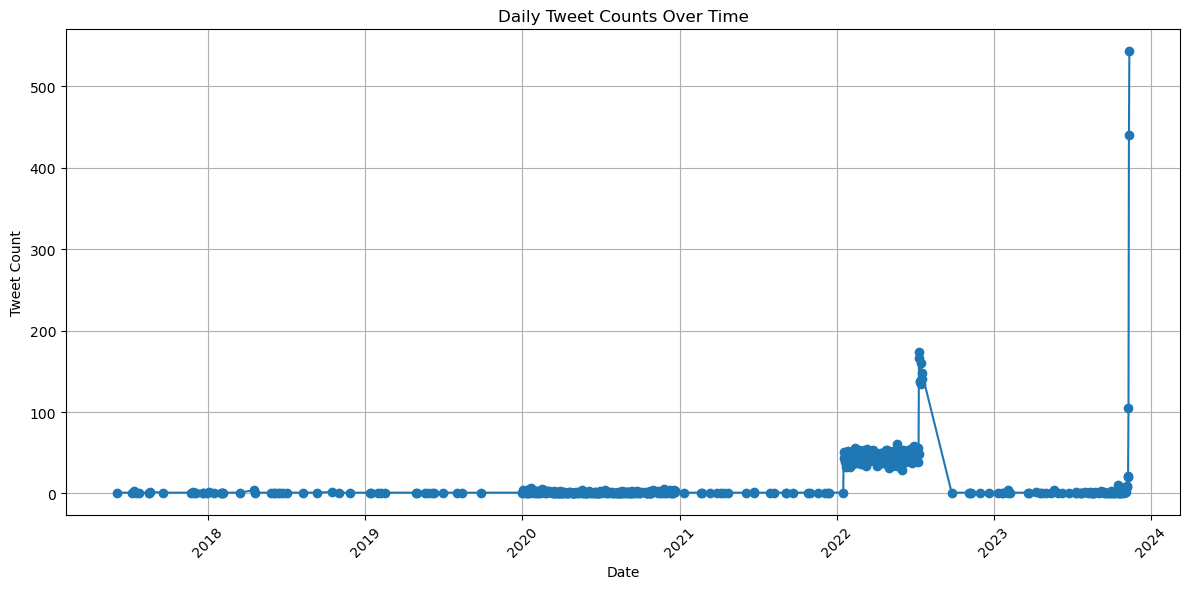

           Date  TweetCount
0    2017-06-02           1
1    2017-07-09           1
2    2017-07-13           3
3    2017-07-18           1
4    2017-07-25           1
..          ...         ...
557  2023-11-08          20
558  2023-11-09          21
559  2023-11-10         105
560  2023-11-11         440
561  2023-11-12         543

[562 rows x 2 columns]


In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Function for temporal analysis
def perform_temporal_analysis(df):
    # Convert the 'Time' column to datetime format
    df['Time'] = pd.to_datetime(df['Time'])
    
    # Extract date and time components
    df['Date'] = df['Time'].dt.date
    
    # Group tweets by date and count the number of tweets per day
    daily_tweet_counts = df.groupby('Date').size().reset_index(name='TweetCount')
    
    # Plot the daily tweet counts over time
    plt.figure(figsize=(12, 6))
    plt.plot(daily_tweet_counts['Date'], daily_tweet_counts['TweetCount'], marker='o', linestyle='-')
    plt.title('Daily Tweet Counts Over Time')
    plt.xlabel('Date')
    plt.ylabel('Tweet Count')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return daily_tweet_counts

# Perform temporal analysis on tweets_df using the 'Time' column
temporal_data = perform_temporal_analysis(tweets_df)

# Display the daily tweet counts over time
print(temporal_data)

We have the daily tweet counts over time. The results show a breakdown of the number of tweets per day from June 2, 2017, to November 12, 2023.